In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/cwurData.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv


In [2]:
snc_df= pd.read_csv('/kaggle/input/world-university-rankings/school_and_country_table.csv')
snc_df.head()

,school_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America


<function matplotlib.pyplot.show(close=None, block=None)>

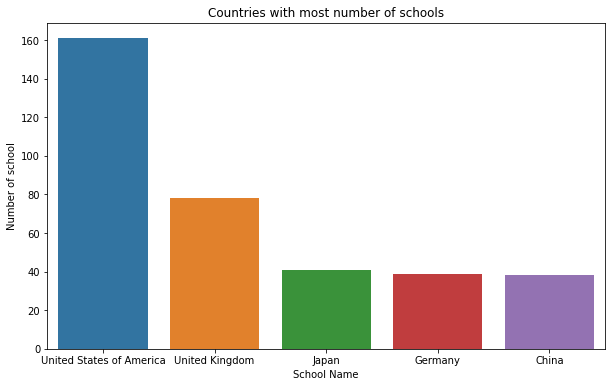

In [3]:
mostschools = snc_df.groupby('country').school_name.count().sort_values(ascending=False).head()

ypoints =np.array(mostschools)
xpoints =np.array(mostschools.index)

plt.figure(figsize=(10,6))

sns.barplot(x=xpoints, y=ypoints)
sns.set_style("darkgrid")

plt.xlabel("School Name")
plt.ylabel("Number of school")
plt.title("Countries with most number of schools")

plt.show

In [4]:
times  = pd.read_csv('/kaggle/input/world-university-rankings/timesData.csv', index_col='world_rank')                         
times.head(10)


,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
world_rank,,,,,,,,,,,,,
1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011


            teaching  research  citations  international  income
world_rank                                                      
1               99.7      98.7       98.8           72.4    34.5
2               97.7      98.0       99.9           54.6    83.7
3               97.8      91.4       99.9           82.3    87.5
4               98.3      98.1       99.2           29.5    64.3
5               90.9      95.4       99.9           70.3     0.0
6               90.5      94.1       94.0           77.7    57.0
6               88.2      93.9       95.1           77.2    73.5
8               84.2      99.3       97.8           39.6     0.0
9               89.2      94.5       88.3           90.0    92.9
10              92.1      89.7       91.5           59.2     0.0


<function matplotlib.pyplot.show(close=None, block=None)>

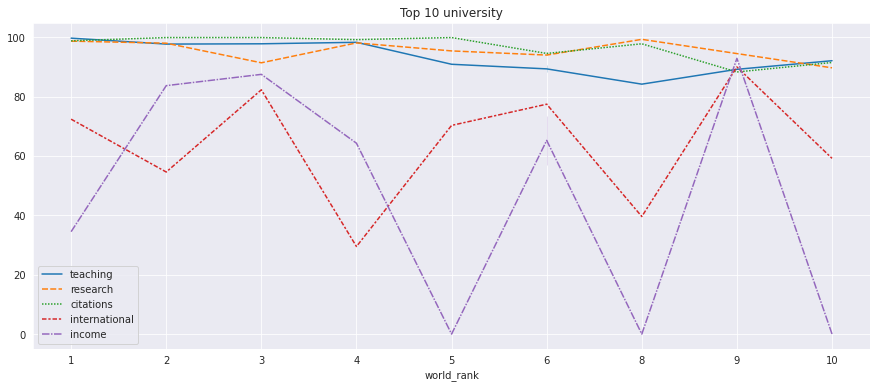

In [5]:
top10 = times.head(10)

top10['international'] = top10['international'].astype(float)
top10['income'] = top10['income'].replace('-',0.0).astype(float)

top10_f  = top10.loc[:,['teaching','research','citations','international','income']]
print(top10_f)

plt.figure(figsize=(15,6))

sns.lineplot(data=top10_f)

plt.title('Top 10 university')

plt.show

In [6]:
cwur = pd.read_csv('/kaggle/input/world-university-rankings/cwurData.csv', index_col='institution')
cwur.head(10)

,world_rank,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
institution,,,,,,,,,,,,,
Harvard University,1,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
Massachusetts Institute of Technology,2,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
Stanford University,3,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
University of Cambridge,4,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
California Institute of Technology,5,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
Princeton University,6,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
University of Oxford,7,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
Yale University,8,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
Columbia University,9,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012


<function matplotlib.pyplot.show(close=None, block=None)>

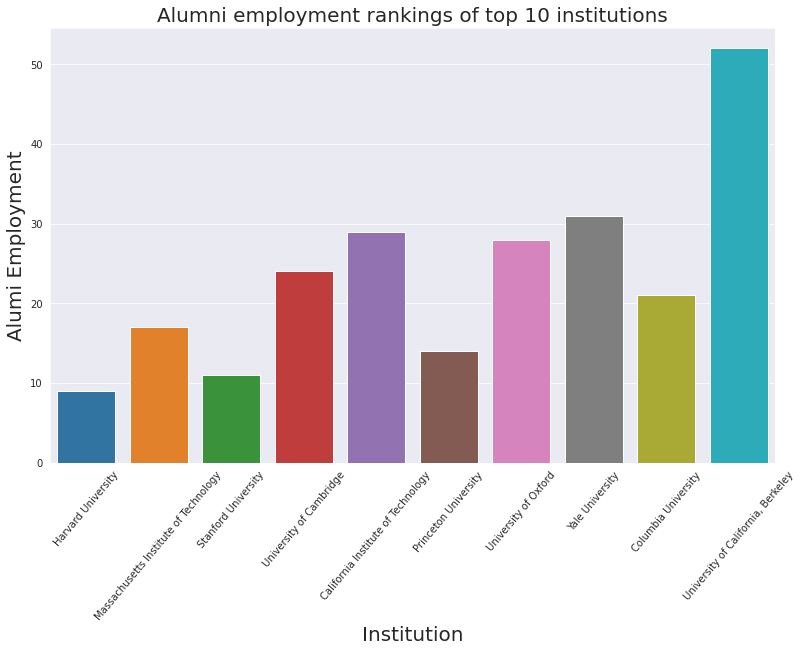

In [7]:
topi= cwur.head(10)

plt.figure(figsize=(13,8))

sns.barplot(x=topi.index , y=topi['alumni_employment'])
sns.barplot(x=topi.index , y=topi['alumni_employment']).set_xticklabels(labels=topi.index, rotation=50)

plt.xlabel("Institution", fontsize=20)
plt.ylabel("Alumi Employment", fontsize=20)
plt.title("Alumni employment rankings of top 10 institutions", fontsize=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

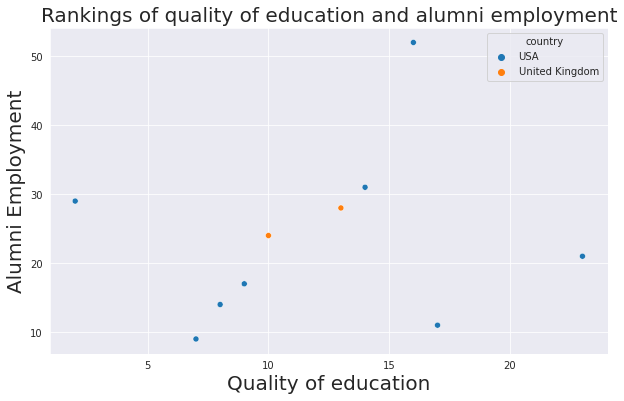

In [8]:
topi= cwur.head(10)

plt.figure(figsize=(10,6))

sns.scatterplot(x="quality_of_education", y="alumni_employment",hue="country", data=topi)

plt.title("Rankings of quality of education and alumni employment", fontsize=20)
plt.xlabel("Quality of education", fontsize=20)
plt.ylabel("Alumni Employment", fontsize=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

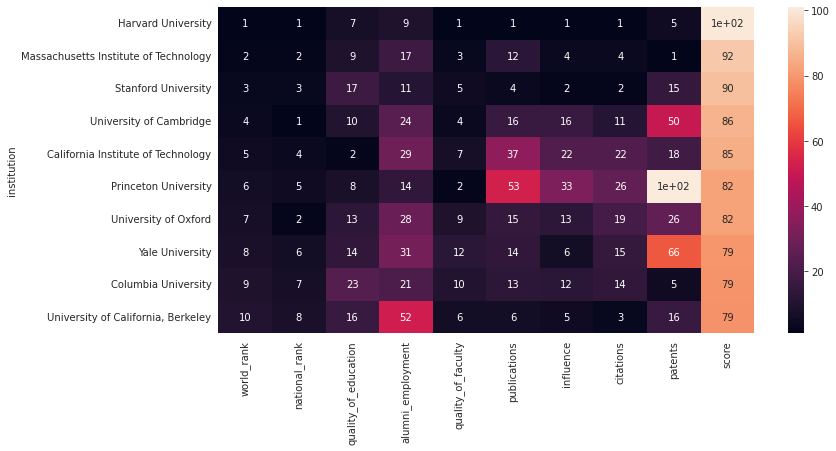

In [9]:
topi= cwur.head(10)

#topi.info()

topi_f = topi.loc[:,['world_rank','national_rank','quality_of_education','alumni_employment'
                      ,'quality_of_faculty','publications','influence','citations','patents','score']]

plt.figure(figsize=(12,6))

sns.heatmap(data=topi_f, annot=True)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

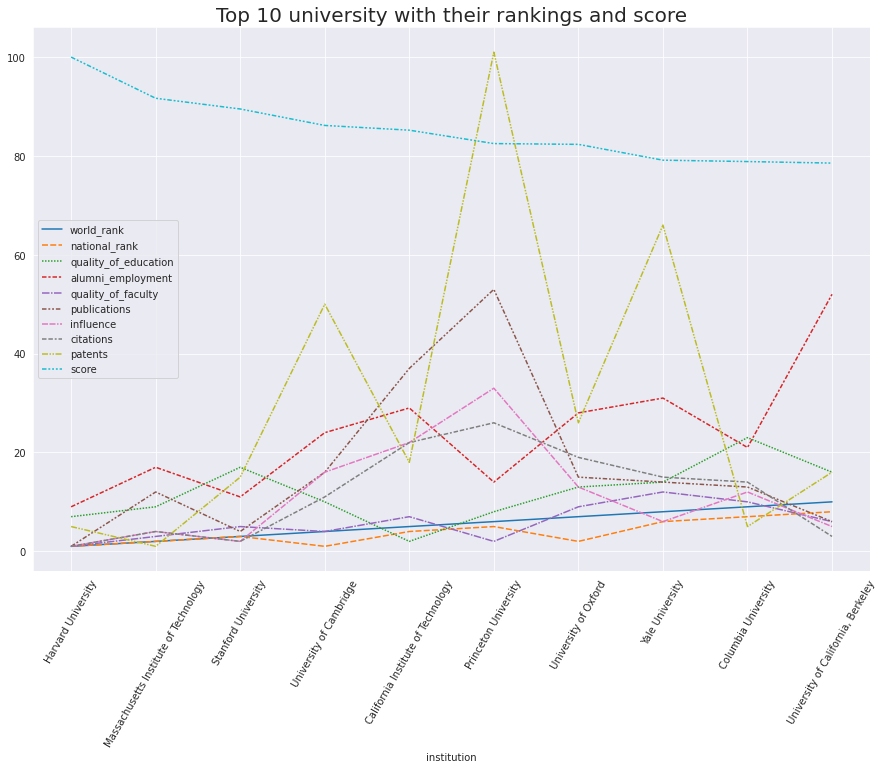

In [10]:
topi_f = topi.loc[:,['world_rank','national_rank','quality_of_education','alumni_employment'
                      ,'quality_of_faculty','publications','influence','citations','patents','score']]

plt.figure(figsize=(15,10))

sns.lineplot(data=topi_f, linestyle='--').set_xticklabels(labels=topi_f.index, rotation=60)

plt.title("Top 10 university with their rankings and score", fontsize=20)
plt.show

In [11]:
shan = pd.read_csv('/kaggle/input/world-university-rankings/shanghaiData.csv', index_col='university_name')
top5= shan.head()

nt= top5.drop(['year'], axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

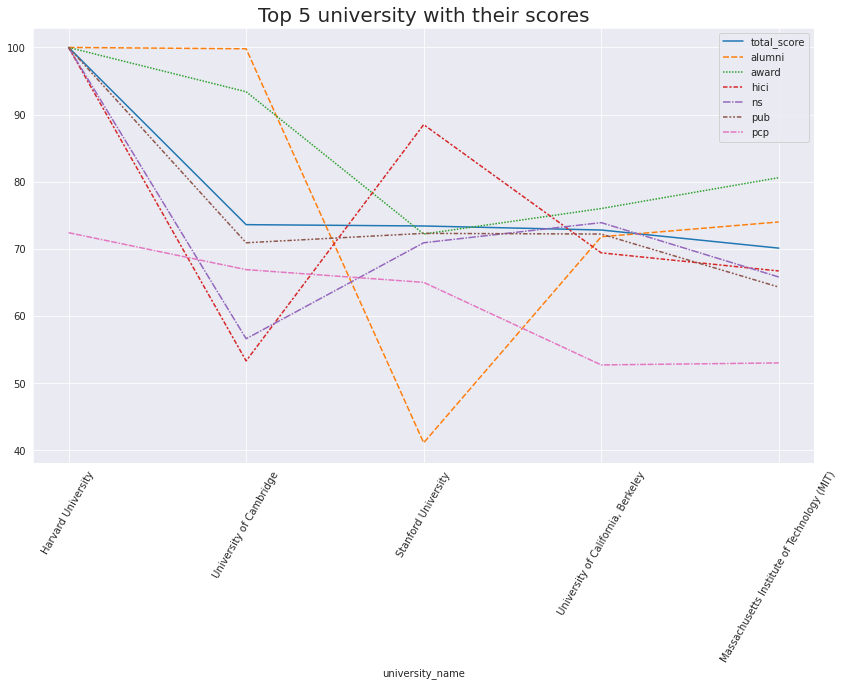

In [12]:
nt= top5.drop(['year'], axis=1)

plt.figure(figsize=(14,8))

sns.lineplot(data=nt, linestyle='--').set_xticklabels(labels=nt.index,rotation=60)

plt.title("Top 5 university with their scores", fontsize=20)
plt.show

In [13]:
eas = pd.read_csv('/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv')

eas.head()

,country_name,series_name,1985,1986,1987,1990,1991,1992,1993,1995,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2015
0,Afghanistan,"Barro-Lee: Average years of primary schooling,...",0.33,NaN,NaN,0.44,NaN,NaN,NaN,0.57,...,0.86,NaN,NaN,NaN,NaN,1.27,NaN,NaN,NaN,NaN
1,Afghanistan,"Barro-Lee: Average years of primary schooling,...",1.03,NaN,NaN,1.26,NaN,NaN,NaN,1.54,...,2.18,NaN,NaN,NaN,NaN,2.64,NaN,NaN,NaN,NaN
2,Afghanistan,"Barro-Lee: Average years of primary schooling,...",0.83,NaN,NaN,0.95,NaN,NaN,NaN,1.26,...,1.01,NaN,NaN,NaN,NaN,2.45,NaN,NaN,NaN,NaN
3,Afghanistan,"Barro-Lee: Average years of primary schooling,...",2.34,NaN,NaN,2.22,NaN,NaN,NaN,2.37,...,2.26,NaN,NaN,NaN,NaN,3.55,NaN,NaN,NaN,NaN
4,Afghanistan,"Barro-Lee: Average years of primary schooling,...",0.54,NaN,NaN,0.92,NaN,NaN,NaN,0.94,...,2.00,NaN,NaN,NaN,NaN,1.29,NaN,NaN,NaN,NaN


In [14]:
eas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79055 entries, 0 to 79054
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  79052 non-null  object 
 1   series_name   79050 non-null  object 
 2   1985          51843 non-null  float64
 3   1986          12 non-null     float64
 4   1987          3 non-null      float64
 5   1990          51846 non-null  float64
 6   1991          1 non-null      float64
 7   1992          3 non-null      float64
 8   1993          1 non-null      float64
 9   1995          51884 non-null  float64
 10  1996          3 non-null      float64
 11  1997          0 non-null      float64
 12  1998          47 non-null     float64
 13  1999          9 non-null      float64
 14  2000          51970 non-null  float64
 15  2001          225 non-null    float64
 16  2002          184 non-null    float64
 17  2003          55 non-null     float64
 18  2004          137 non-null

In [15]:
ser = eas.country_name.unique()

len(ser)

189

<function matplotlib.pyplot.show(close=None, block=None)>

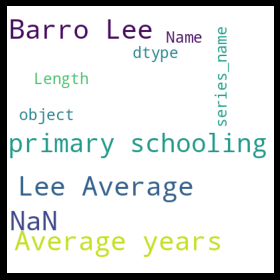

In [16]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(height=400,
                     width = 400,
                     background_color="white",
                     max_font_size= 40,
                     stopwords=stopwords).generate(str(eas['series_name']))

plt.figure(facecolor="black")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show